## Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

df = pd.read_csv("../data/day.csv", index_col='instant')
df.shape

(730, 15)

In [2]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Null Analysis

In [3]:
df.isna().sum().any() # no nulls

False

In [4]:
## data types fix
df['dteday'] = df['dteday'].apply(lambda x: dt.datetime.strptime(str(x), "%d-%m-%Y"))
# added following datatypes additionally as per data dictionary
req_dtypes = {
    # "dteday" : "datetime64",
    "season" : "category",
    "yr" : "category",
    "mnth" : "category",
    "holiday" : "category",
    "weekday" : "category",
    "workingday" : "category",
    "weathersit" : "category",
}
df = df.astype(req_dtypes)

#### Data Validation

In [5]:
assert len(df['dteday'].dt.year.unique()) == 2, "Total 2 years"
assert len(df['dteday'].dt.month.unique()) == 12, "Total 12 months"
assert len(df['dteday'].dt.day.unique()) <= 31, "Always 31 or less than days in a month"
assert all(df['dteday'].dt.year == df['yr'].apply(lambda x: {0: 2018, 1: 2019}[x])), "Years are not regular calender"

#### EDA

In [6]:
## EDA specific data frame
df_eda = df.copy(deep=True) 
df_eda['yr'] = df['yr'].apply(lambda x: {0: 2018, 1: 2019}[x])
df_eda['weekday'] = df['dteday'].dt.day_name()
df_eda['season'] = df['season'].apply(lambda x: {1:'spring', 2:'summer', 3:'fall', 4:'winter'}[x])
df_eda['weathersit'] = df['weathersit'].apply(lambda x: 
    {
        1: "Partly cloudy",
        2: "Mist, Cloudy",
        3: "Light Snow, Light Rain, Thunderstorm, Scattered clouds",
        4: "Heavy Rain, Thunderstorm, Mist, Snow, Fog"
    }[x])
df_eda.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,spring,2018,1,0,Monday,0,"Mist, Cloudy",14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,spring,2018,1,0,Tuesday,0,"Mist, Cloudy",14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,spring,2018,1,0,Wednesday,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,spring,2018,1,0,Thursday,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,spring,2018,1,0,Friday,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df_eda.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Pairplots

<Figure size 720x5760 with 0 Axes>

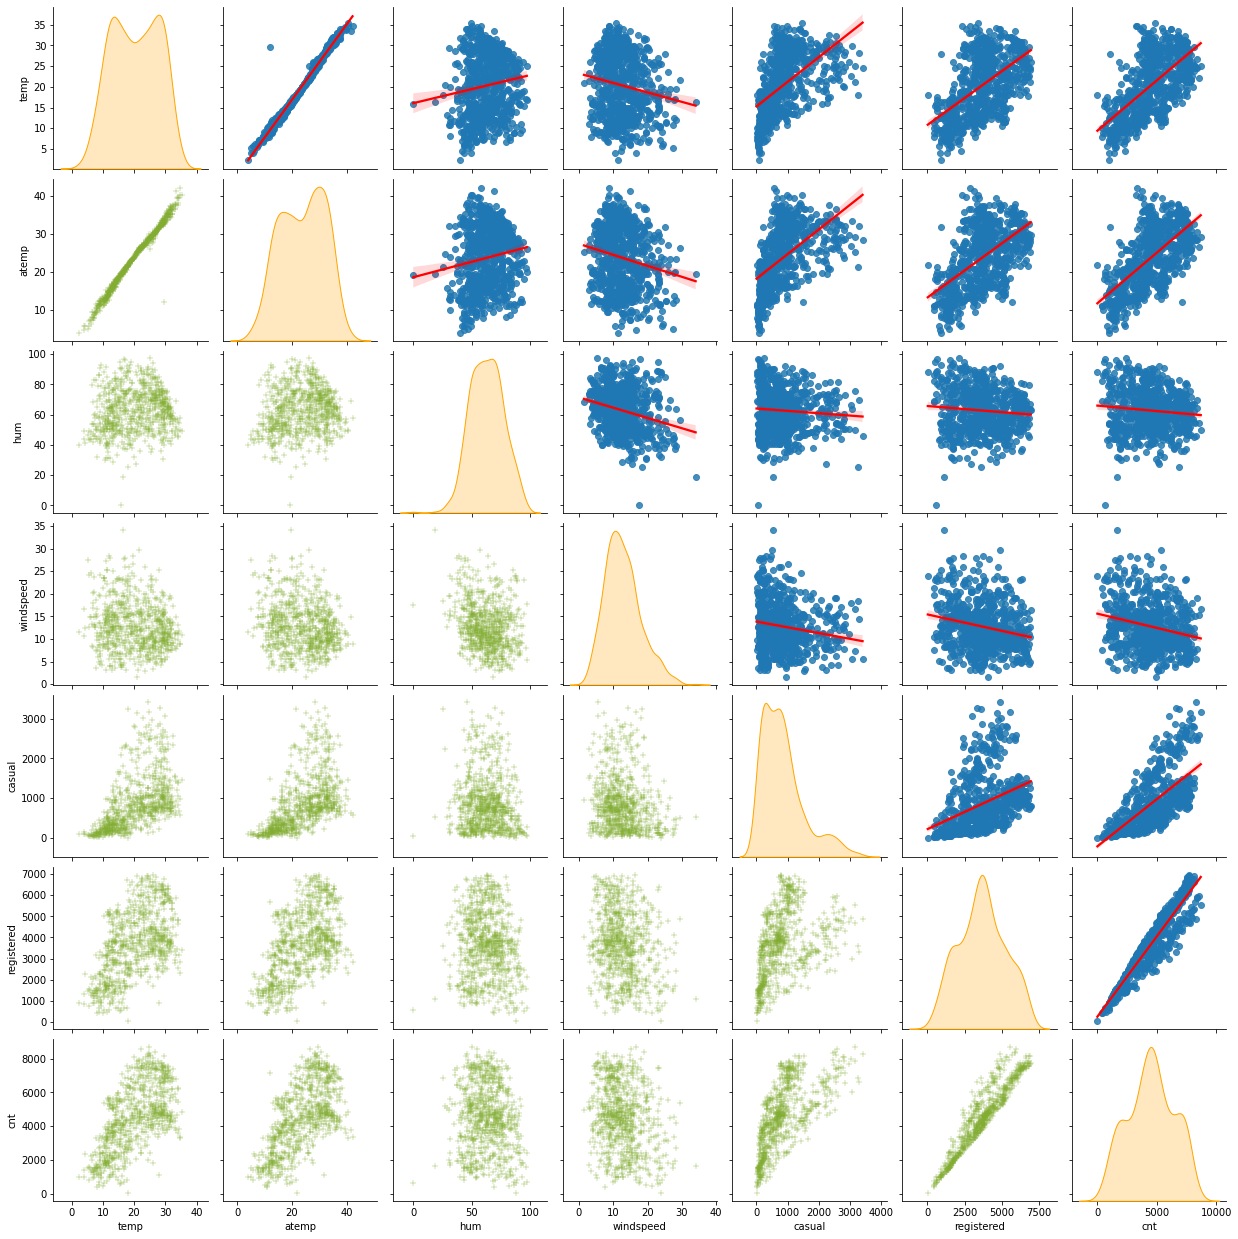

In [8]:
plt.figure(figsize=(10, 80))

g = sns.pairplot(df_eda,
                 markers="+",
                 diag_kind="kde",
                 plot_kws={'alpha': 0.75, 'color': '#82ad32'},
                 diag_kws= {'color': 'orange'}
)
g.map_upper(sns.regplot, line_kws={'color':'red'})

In [9]:
## UTILITY Functions
from matplotlib import colors as mcolors
import random

random.seed(123)

COLORS = [x for x in list(mcolors.cnames.values()) if ((x!='FFFFFF' or x!='#000000') and (x < '#F00000'))]

def get_n_rows(n):
    div, f_div = n/2, n//2
    n_rows = f_div if div == f_div else f_div + 1
    return n_rows

['#DEB887', '#1E90FF', '#DC143C', '#40E0D0', '#20B2AA', '#00008B', '#8A2BE2']


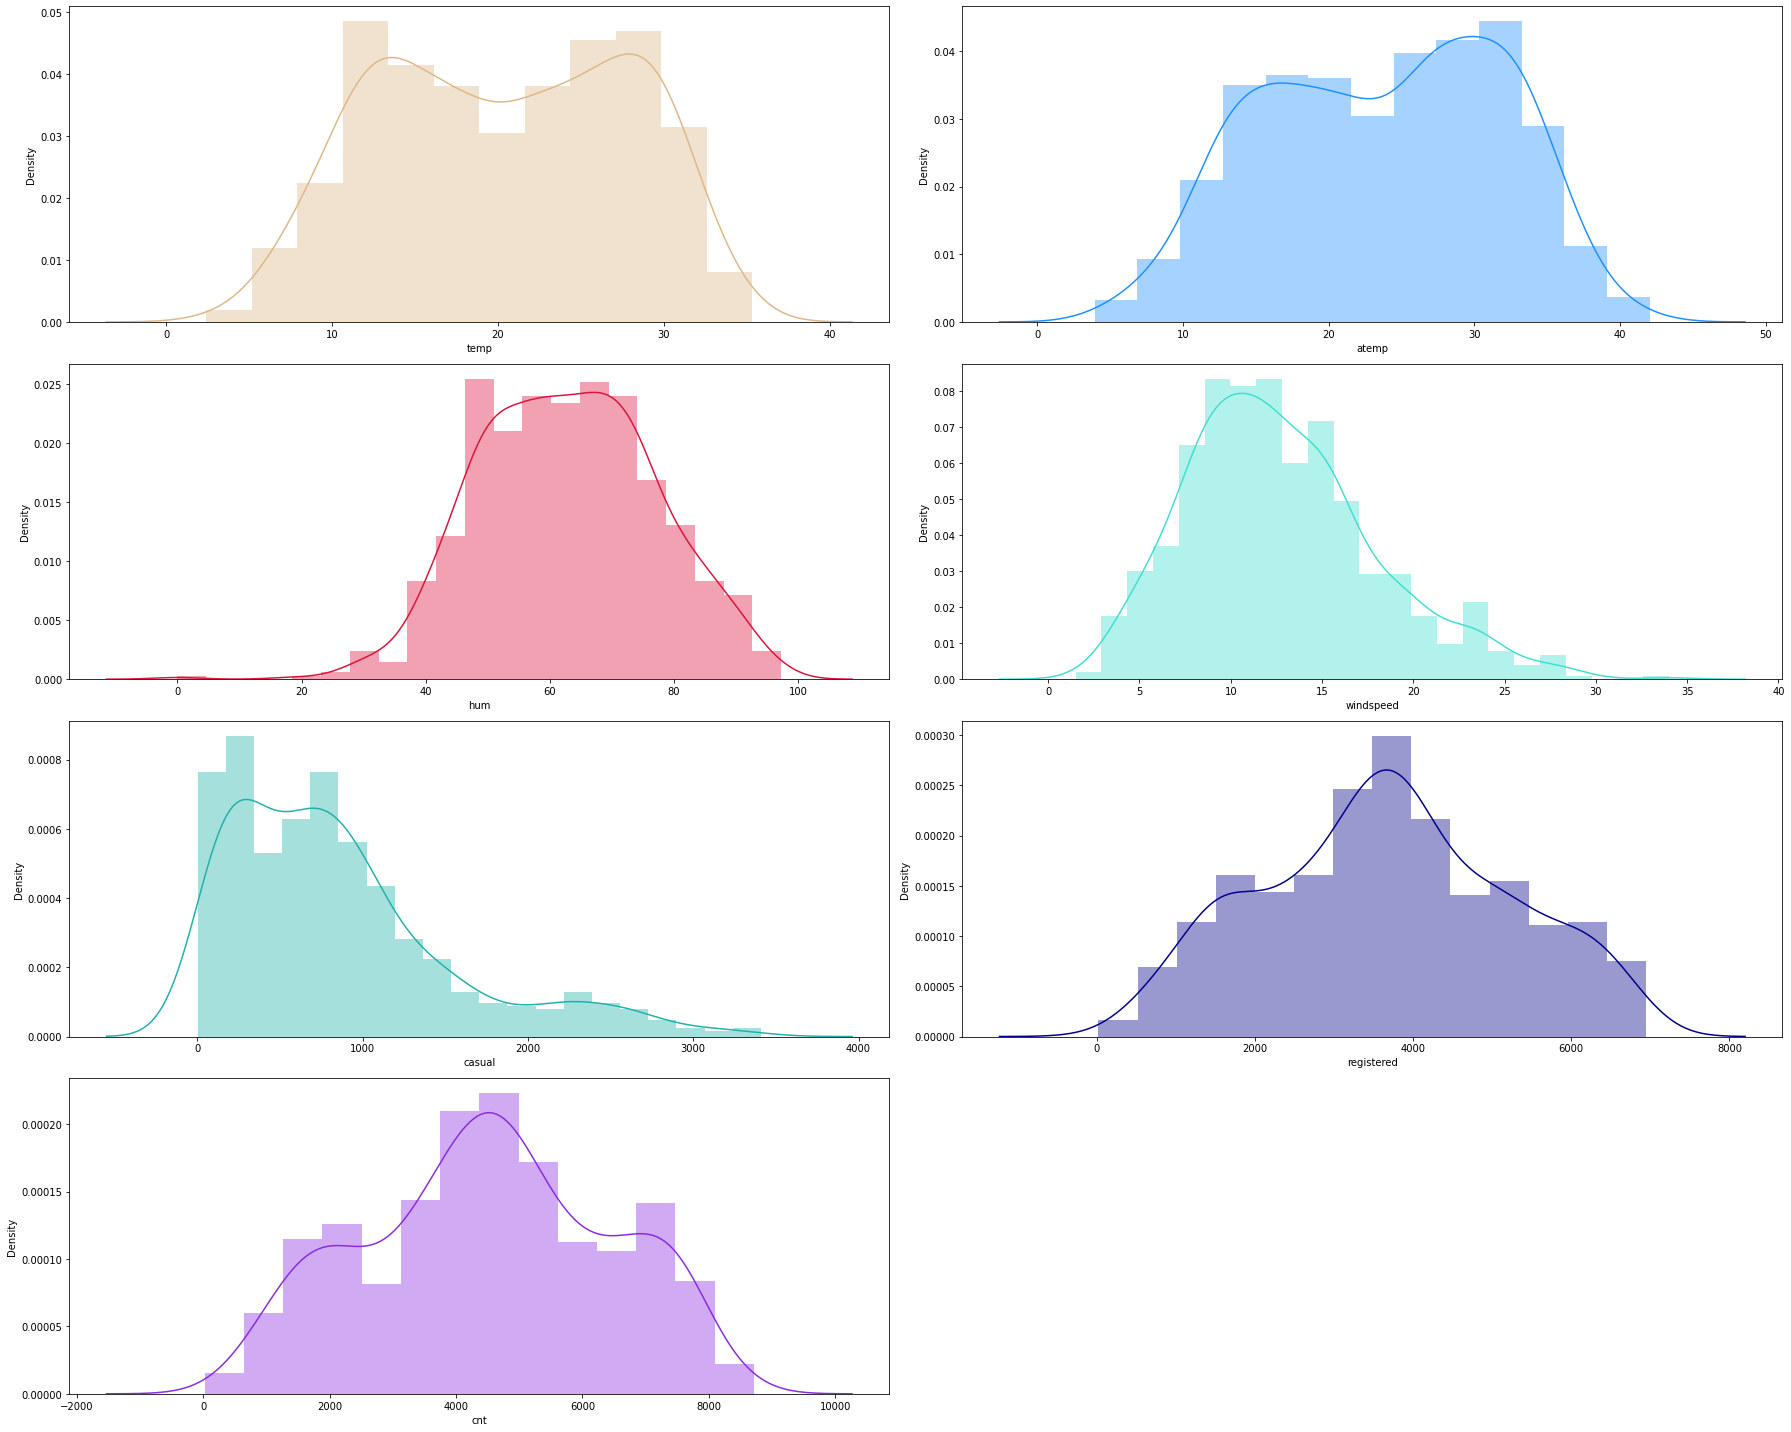

In [10]:
## distribution plots
plt.figure(figsize=(25, 20))
numerical_vars = df_eda.select_dtypes('number').columns

n_rows = get_n_rows(len(numerical_vars))

color_tmp = random.sample(COLORS, k=len(numerical_vars))
print(color_tmp)
for ix, each_num_var in enumerate(numerical_vars):
    plt.subplot(n_rows, 2, ix+1)
    sns.distplot(df_eda[each_num_var], color=color_tmp[ix])

plt.tight_layout()

In [11]:
df_eda['day_in_week_name'] = df['dteday'].dt.day_name().astype('category') # day name for understanding

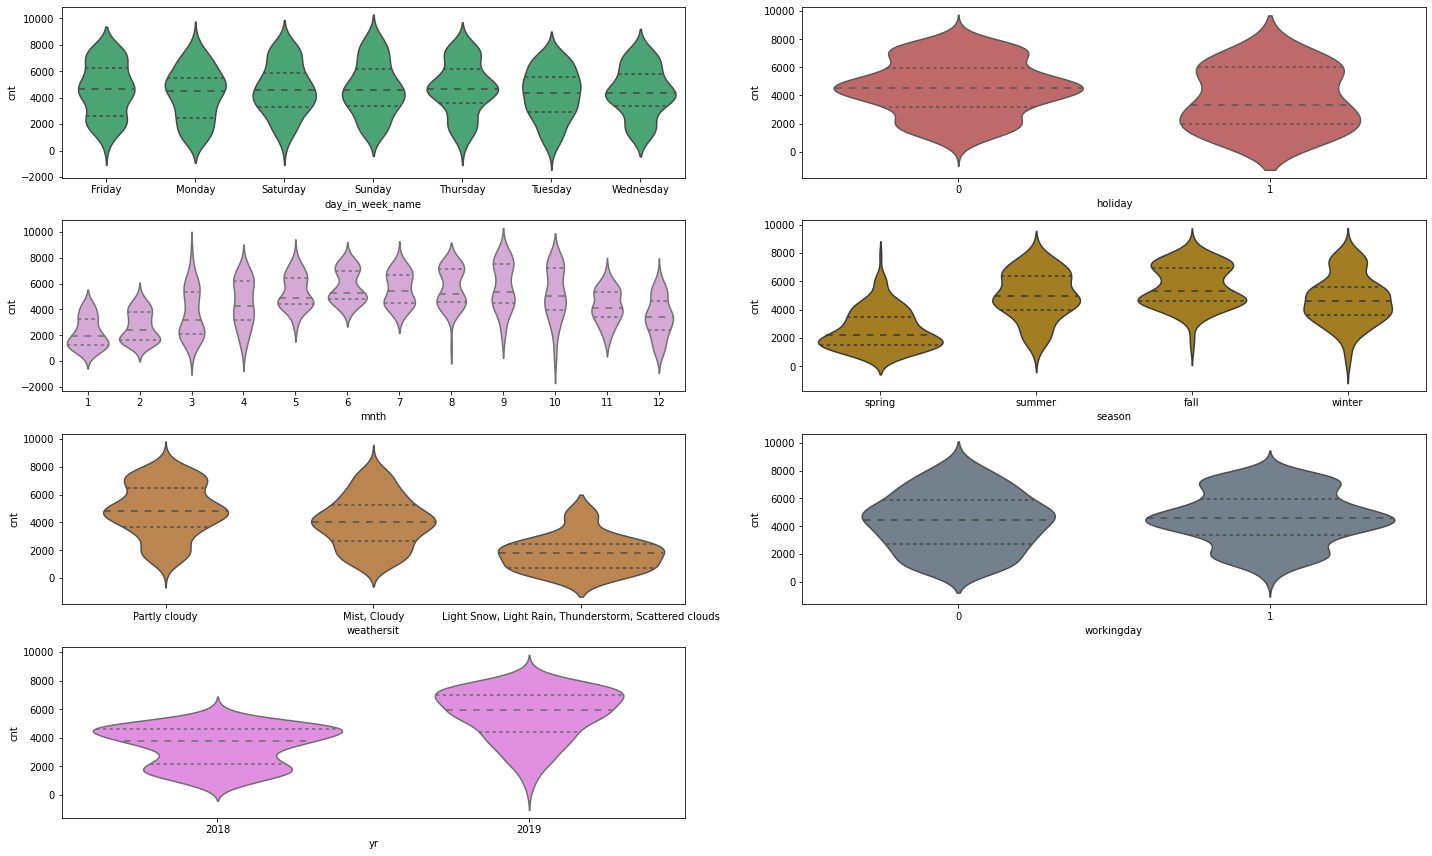

In [12]:
categorical_vars = sorted(df_eda.select_dtypes('category').columns)

n_rows = get_n_rows(len(categorical_vars))

random.shuffle(COLORS)
color_tmp = random.sample(COLORS, len(categorical_vars))

plt.figure(figsize=(20, 12))
for ix, each_cat_var in enumerate(categorical_vars):
    plt.subplot(n_rows, 2, ix+1)
    sns.violinplot(data=df_eda, x=each_cat_var, y='cnt', inner='quartile', color=color_tmp[ix])

plt.tight_layout()

##### Correlation Matrix

<AxesSubplot:>

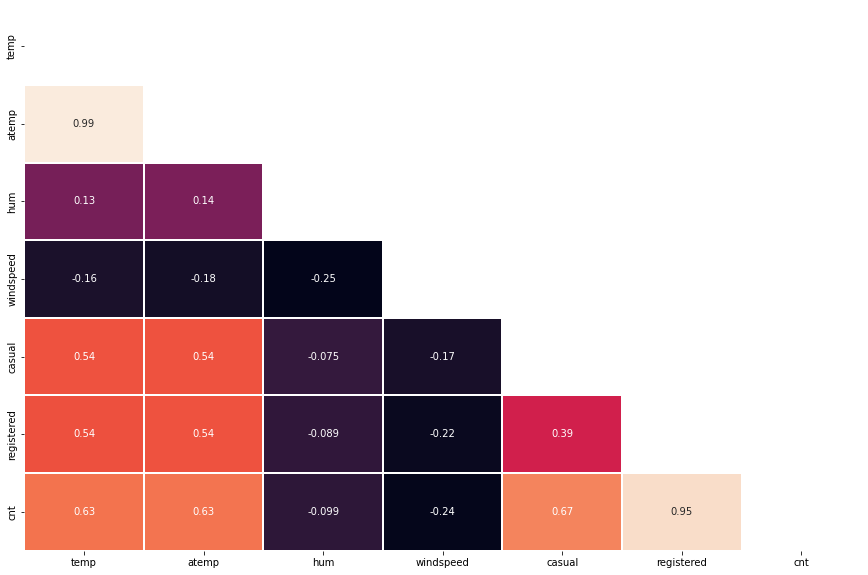

In [13]:
plt.figure(figsize=(15, 10))
corr_mat = df_eda.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_eda.corr(), annot=True, mask=mask, linewidths=2, cbar=False)

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

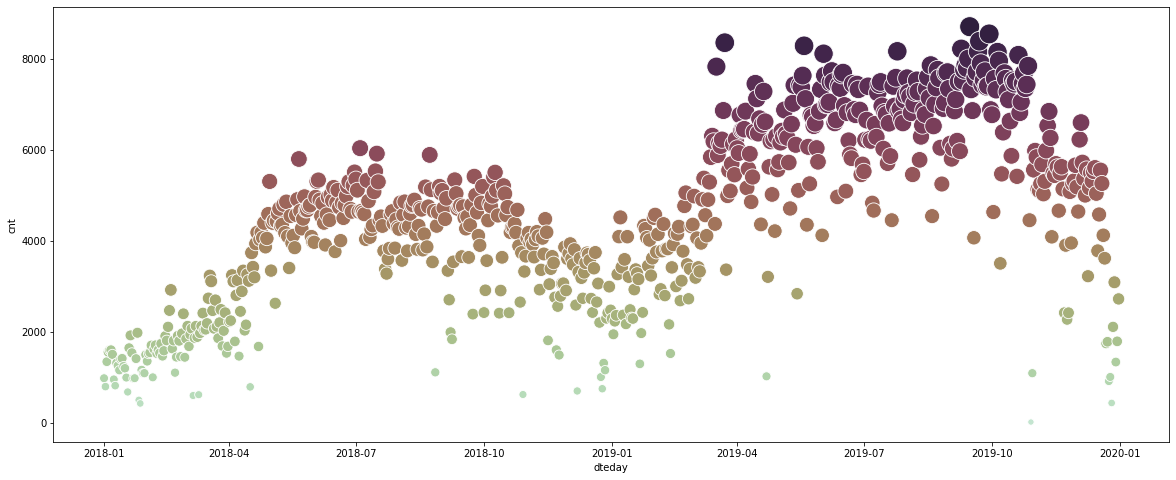

In [14]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df, x_bins=24, x='dteday', y='cnt', size='cnt', hue='cnt', palette="ch:start=-.2,rot=.89", legend=False, sizes=(40, 400))

In [15]:
"we can remove registered and casual as cnt is sum of those both variables" if all(df['registered']+df['casual'] == df['cnt']) else "cnt column is required"

'we can remove registered and casual as cnt is sum of those both variables'

##### Drop - correlated

In [16]:
# removing highly correlated columns
df = df.drop(['registered', 'casual', 'atemp'], axis='columns') # axis = 1
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
2,2018-01-02,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
3,2018-01-03,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
4,2018-01-04,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
5,2018-01-05,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [17]:
df.shape

(730, 12)

## Preparing the data for Modelling

- train-test split
- encoding categorical variables
- scaling etc

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

selected_cols = [x for x in df.columns if x not in ('dteday', 'cnt')] # ignoring date
categorical_vars = df[selected_cols].select_dtypes('category').columns
numerical_vars = df[selected_cols].select_dtypes(include='number').columns


X, y = df[selected_cols], df[['cnt']]

cols_required_in_proportions = ['season'] #, 'weathersit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=123, stratify=X[cols_required_in_proportions])
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(489, 10) (241, 10)
(489, 1) (241, 1)


##### Train-test proportion

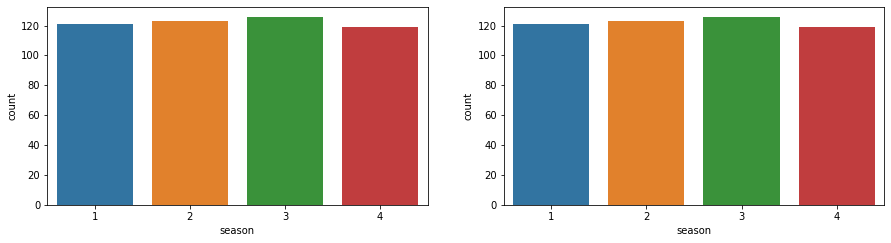

In [19]:
## split with same proportion
plt.figure(figsize=(15, 8))
n_rows = get_n_rows(len(cols_required_in_proportions))*2
flag = 1
cntr = 0
for ix, each_col in enumerate(cols_required_in_proportions):
    cntr += 1
    plt.subplot(n_rows, 2, cntr)
    sns.countplot(X_train[each_col])
    cntr += 1
    plt.subplot(n_rows, 2, cntr)
    sns.countplot(X_train[each_col])

In [20]:
## Preprocessing Utilities
def scaler_fn(df, interested_vars, remaining_vars, scaler, test_data=False):
    index = df.index
    if not test_data:
        df_scaled_vars = scaler.fit_transform(df[interested_vars])
    else:
        df_scaled_vars = scaler.transform(df[interested_vars])

    df_scaled_vars = pd.DataFrame(df_scaled_vars, columns=scaler.get_feature_names_out(), index=index)
    df_scaled = pd.concat((df[remaining_vars], df_scaled_vars), axis=1)

    return df_scaled

def encoder_fn(df, interested_vars, remaining_vars, encoder, test_data=False):
    index = df.index
    if not test_data:
        df_encoded_vars = encoder.fit_transform(df[interested_vars]).toarray()
    else:
        df_encoded_vars = encoder.transform(df[interested_vars]).toarray()
    
    df_encoded_vars = pd.DataFrame(df_encoded_vars, columns=encoder.get_feature_names_out(), index=index)
    df_encoded = pd.concat((df[remaining_vars], df_encoded_vars), axis=1)

    return df_encoded

In [21]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

In [22]:
# numerical_vars, categorical_vars
X_train_scaled = scaler_fn(df=X_train, interested_vars=numerical_vars, remaining_vars=categorical_vars, scaler=scaler, test_data=False)
X_train_encoded = encoder_fn(df=X_train_scaled, interested_vars=categorical_vars, remaining_vars=numerical_vars, encoder=encoder, test_data=False)
X_train_encoded

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
356,0.461482,0.702734,0.059363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
562,0.892296,0.545666,0.338275,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
442,0.523781,0.776032,0.249281,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
143,0.725462,0.776032,0.504448,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
467,0.428749,0.296102,0.639446,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.538565,0.636416,0.437679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,0.854283,0.601512,0.259639,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.387843,0.729291,0.431149,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
# numerical_vars, categorical_vars
X_test_scaled = scaler_fn(df=X_test, interested_vars=numerical_vars, remaining_vars=categorical_vars, scaler=scaler, test_data=True)
X_test_encoded = encoder_fn(df=X_test_scaled, interested_vars=categorical_vars, remaining_vars=numerical_vars, encoder=encoder, test_data=True)
X_test_encoded

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
604,0.816270,0.664921,0.253694,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
569,0.864843,0.614311,0.277431,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
527,0.838445,0.465969,0.442114,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
391,0.358003,0.719603,0.121678,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
586,0.882793,0.511344,0.318982,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.450923,0.486911,0.446565,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
578,0.834221,0.591041,0.283386,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
360,0.332752,0.352935,0.517863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training the model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
lr.fit(X_train_encoded, y_train)

pred_train = lr.predict(X_train_encoded)
pred_train[:3], y_train[:3]['cnt'].tolist()

(array([[2305.36090461],
        [6593.15770059],
        [4282.4156703 ]]),
 [3068, 6830, 5892])

In [25]:
from sklearn.metrics import r2_score

In [26]:
def plot_reg(y_true, y_pred, title='Train'):
    plot_df = pd.DataFrame({'index':y_true.index, 'actual': y_true.cnt, 'predicted': y_pred.reshape(-1)})
    # plot_df
    plt.figure(figsize=(20, 6))
    sns.scatterplot(data=plot_df['actual'])
    sns.lineplot(data=plot_df['predicted'], color='r')
    plt.title(title)

In [27]:
def train_test_model(X_train, y_train, X_test, y_test):
    print("----"*30)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    plot_reg(y_true=y_train, y_pred=pred_train)

    pred_test = lr.predict(X_test)
    plot_reg(y_true=y_test, y_pred=pred_test, title='Test')

    print("Train Accuracy:", r2_score(y_true=y_train, y_pred=pred_train))
    print("Test Accuracy:", r2_score(y_true=y_test, y_pred=pred_test))

    return lr

------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8486508091308413
Test Accuracy: 0.8358943184508156


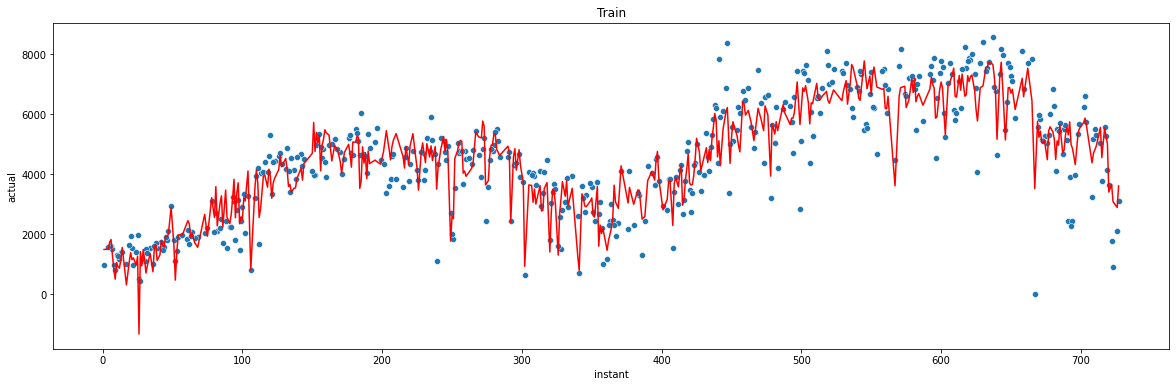

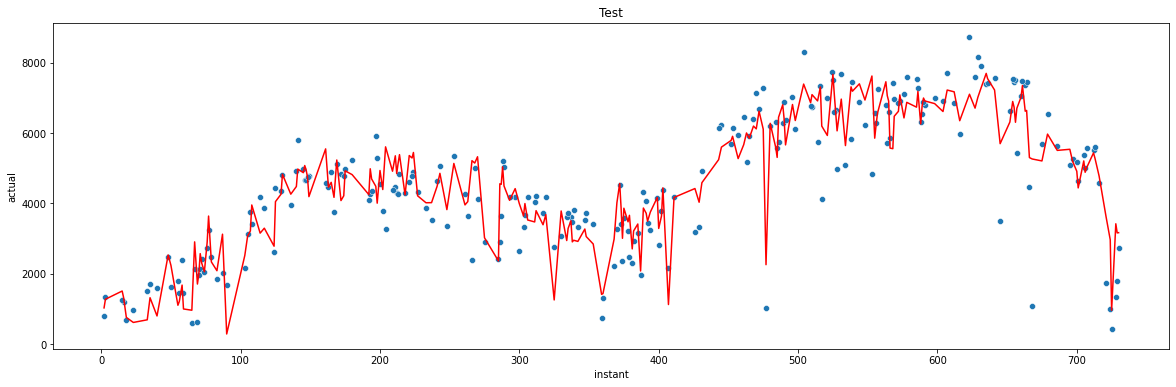

In [28]:
baseline_lr = train_test_model(X_train=X_train_encoded,
    y_train=y_train,
    X_test=X_test_encoded,
    y_test=y_test
)

Handling Outliers for temp
 ---> Old Shape:  (730, 12)
 ---> New Shape:  (489, 28)
Handling Outliers for hum
 ---> Old Shape:  (730, 12)
 ---> New Shape:  (489, 28)
Handling Outliers for windspeed
 ---> Old Shape:  (730, 12)
 ---> New Shape:  (480, 28)


<AxesSubplot:>

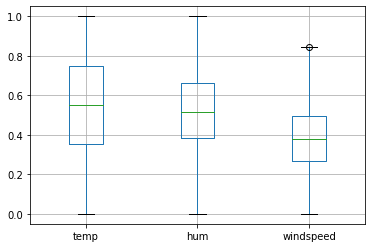

In [29]:
def remove_outliers(col, df_x, df_y):
    print(f"Handling Outliers for {col}")
    # IQR
    Q1 = np.percentile(df_x[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df_x[col], 75, interpolation = 'midpoint')
    
    IQR = Q3 - Q1
    print(" ---> Old Shape: ", df.shape)

    # Upper bound
    upper = np.where(df_x[col] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df_x[col] <= (Q1-1.5*IQR))
 
    ''' Removing the Outliers '''
    df_outliers = df_x.drop(df_x.index[upper[0]])
    df_outliers = df_outliers.drop(df_x.index[lower[0]])

    df_targ = df_y.drop(df_y.index[upper[0]])
    df_targ = df_targ.drop(df_y.index[lower[0]])


    print(" ---> New Shape: ", df_outliers.shape)
    return (df_outliers, df_targ)

X_train_outliers, y_train_outliers = X_train_encoded.copy(deep=True), y_train.copy(deep=True)
for each_num_var in numerical_vars:
    X_train_outliers, y_train_outliers = remove_outliers(each_num_var, X_train_outliers, y_train_outliers)

X_train_outliers[numerical_vars].boxplot()

------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8478154652408694
Test Accuracy: 0.8361880601956377


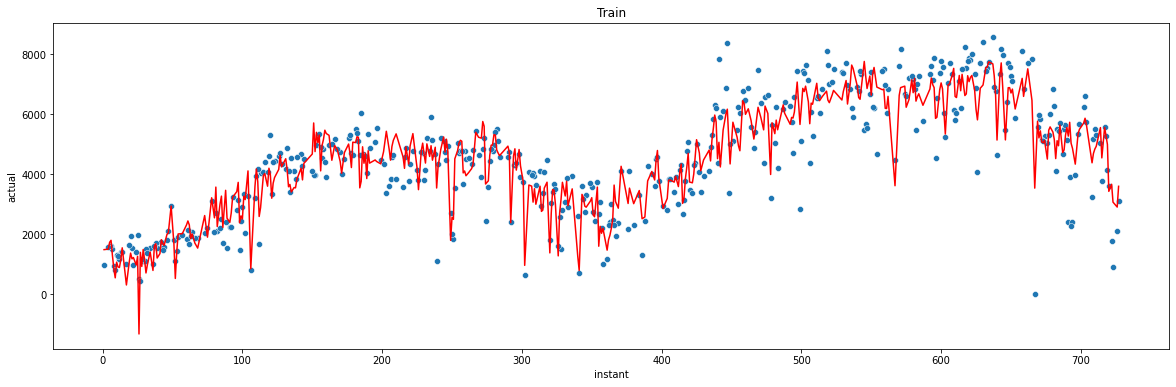

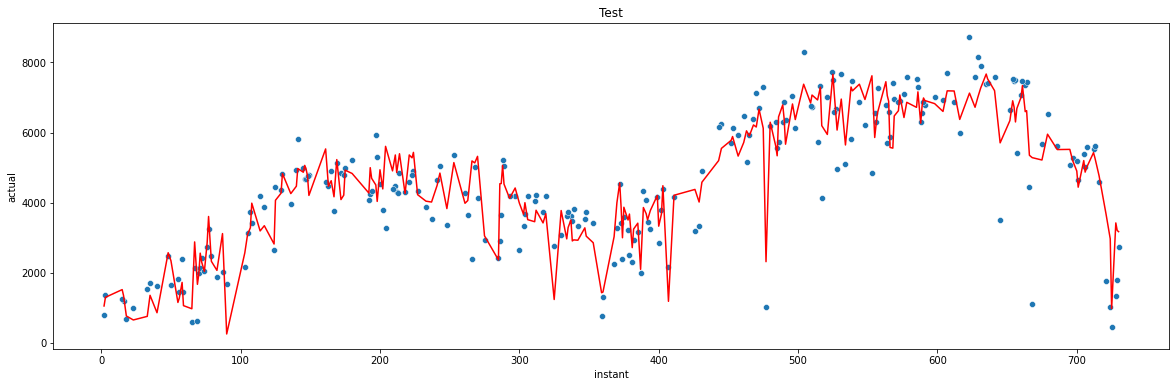

In [30]:
outliers_removed_lr = train_test_model(X_train=X_train_outliers,
    y_train=y_train_outliers,
    X_test=X_test_encoded,
    y_test=y_test
)

### Feature Selection

In [31]:
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
def get_n_features_rfe(model, X_train, y_train, n_features=15):
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    rfe_df = pd.DataFrame(list(
        zip(
            X_train.columns,
            rfe.support_, 
            rfe.ranking_
            )
        ), 
        columns=['column', 'support', 'rank']
    )
    # rfe_df.sort_values(by=['rank'], ascending=[True])
    return rfe_df[rfe_df['support']]['column'].tolist()

In [33]:
def get_fit_summary(X, y):
    X_sm = sm.add_constant(X)
    lr = sm.OLS(y, X_sm).fit()
    return lr.summary()

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

def update_df_cols(df, drop_cols):
    return df[[col for col in df.columns if col not in drop_cols]]


def get_insignificant_col(lr_summary):
    summary = pd.DataFrame(lr_summary.tables[1].data)
    summary.columns = ['column', 'coef', 'std err', 't', 'significance (p>|t|)', 'range_low (0.025)', 'range_high (0.095)']
    summary = summary.iloc[1:]
    summary = summary.astype({x: 'float64' for x in summary.columns if x!='column'})
    records = summary[summary['significance (p>|t|)']>0.05].sort_values(by='significance (p>|t|)', ascending=[False])
    if len(records)!=0:
        top_rec=records.iloc[0]
        return (top_rec['column'], top_rec['significance (p>|t|)'])
    else:
        return None

def get_score_rep(lr_summary):
    score_rep = pd.DataFrame(lr_summary.tables[0].data)[[2, 3]].T
    score_rep.columns = [x.replace(':', '').strip() for x in score_rep.iloc[0]]
    score_rep = score_rep.iloc[1:].reset_index(drop=True)
    return [float(x.strip()) if x.strip()!='' else None for x in score_rep.values[0].tolist()][:2]

def see_results(col, drop_cols):
    if col!='':
        drop_cols.append(col)
        drop_cols = list(set(drop_cols))
    dummy_x = update_df_cols(X_train_encoded, drop_cols)
    lr_summary = get_fit_summary(dummy_x, y_train)
    return lr_summary, calculate_vif(dummy_x)

In [34]:
def process_significance_vif(col, drop_cols):
    while True:
        lr_summary, vif = see_results(col, drop_cols)
        record = get_insignificant_col(lr_summary=lr_summary)
        score_rep = get_score_rep(lr_summary=lr_summary)
        if not record:
            break
        st = ''
        if int(vif[vif['Features']=='temp']['VIF'][0]) > 5:
            st += f" VIF is {int(vif[vif['Features']=='temp']['VIF'][0])}"
        col, significance = record[0], record[1]
        print(f" [R2: {score_rep[0]}, Adj.R2: {score_rep[1]} {st}] ---> Dropping {col} : {significance}")
    
    return lr_summary, vif, score_rep, record

### RFE

['mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5']
------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8436295914562643
Test Accuracy: 0.8369239658405866


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     170.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.39e-179
Time:                        22:40:38   Log-Likelihood:                -3940.0
No. Observations:                 489   AIC:                             7912.
Df Residuals:                     473   BIC:                             7979.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1314.7690    203.650      6.456      0.000     914.599    1714.939
temp          4229.7858    289.866     14.592      0.000    3660.201    4799.370
hum          -1317.7279    262.914     -5.012      0.000   -1834.352    -801.104
windspeed    -1222.7461    207.393     -5.896      0.000   -1630.272    -815.220
season_2      1023.7320    132.566      7.722      0.000     763.241    1284.223
season_3       443.0285    196.065      2.260      0.024      57.762     828.295
season_4      1214.2461    122.229      9.934      0.000     974.067    1454.425
yr_1          2013.6168     72.209     27.886      0.000    1871.726    2155.508
mnth_3         284.9399    133.312      2.137      0.033      22.984     546.896
mnth_8         327.8275    161.129      2.035      0.042      11.209     644.446
mnth_9         967.3244    147.221      6.571      0.000     678.037    1256.612
mnth_10        686.5667    158.792      4.324      0.000     374.541     998.592
weekday_6      551.2055    126.940      4.342      0.000     301.770     800.641
workingday_1   416.2311     97.450      4.271      0.000     224.743     607.719
weathersit_2  -361.5348     94.581     -3.822      0.000    -547.386    -175.684
weathersit_3 -1961.5921    255.096     -7.690      0.000   -2462.854   -1460.330
==============================================================================
Omnibus:                       70.304   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.829
Skew:                          -0.793   Prob(JB):                     1.31e-32
Kurtosis:                       5.166   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

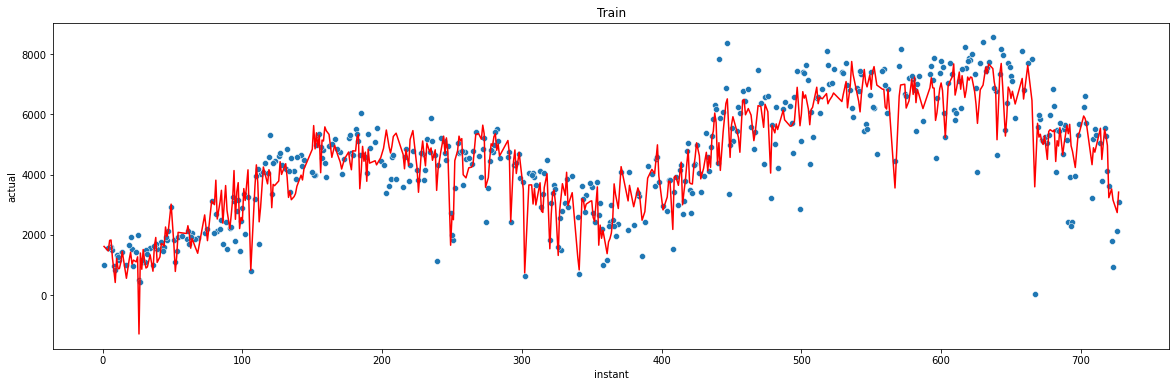

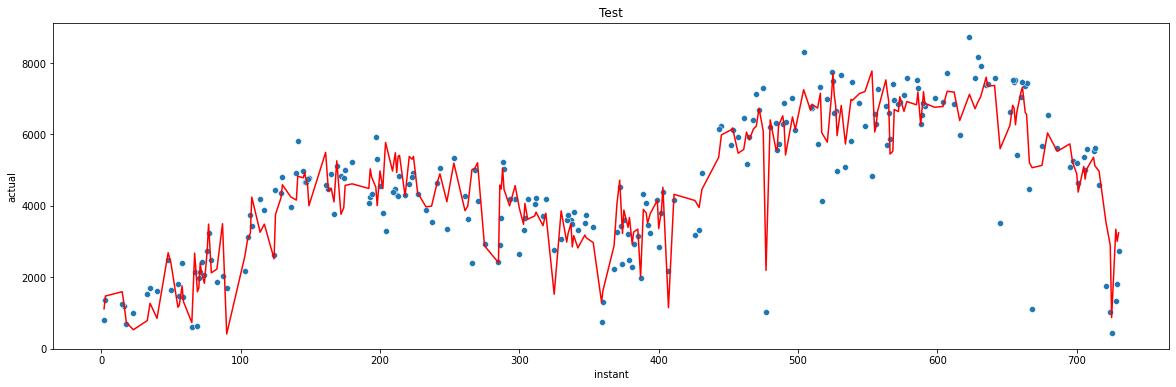

In [35]:
spec_cols = get_n_features_rfe(model=baseline_lr,
    X_train=X_train_encoded, 
    y_train=y_train
)
drop_cols = [x for x in X_train_encoded.columns if x not in spec_cols]
print(drop_cols)

X_train_rfe = update_df_cols(X_train_encoded, drop_cols)
lr_summary_rfe = get_fit_summary(X_train_rfe, y_train)

processed_lr_rfe = train_test_model(X_train=X_train_encoded[spec_cols],
    y_train=y_train,
    X_test=X_test_encoded[spec_cols],
    y_test=y_test
)
lr_summary_rfe

### RFE + Manual

['mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5']
Inital no. of columns to be dropped 13
After processing no. of columns to be dropped 13
['mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5']
------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8436295914562643
Test Accuracy: 0.8369239658405866


,Features,VIF
0,temp,22.21
1,hum,11.62
4,season_3,8.03
2,windspeed,4.49
12,workingday_1,4.49
3,season_2,3.57
5,season_4,2.89
13,weathersit_2,2.39
6,yr_1,1.97
11,weekday_6,1.78


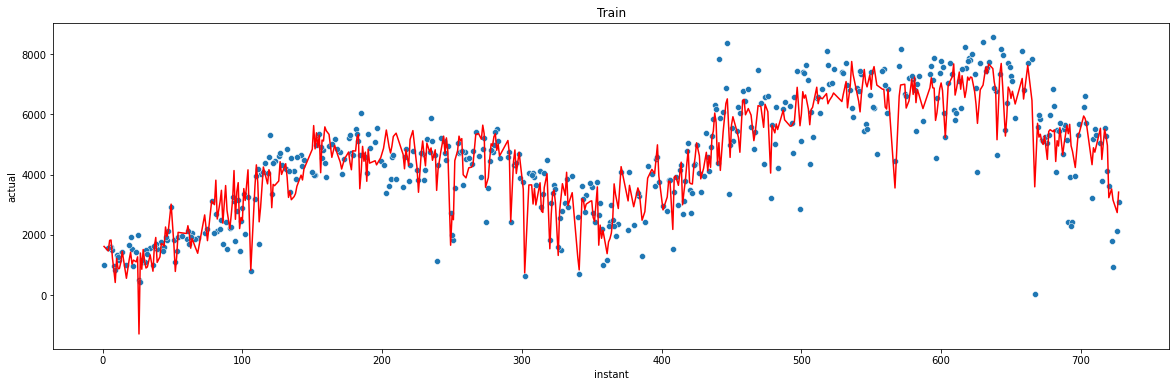

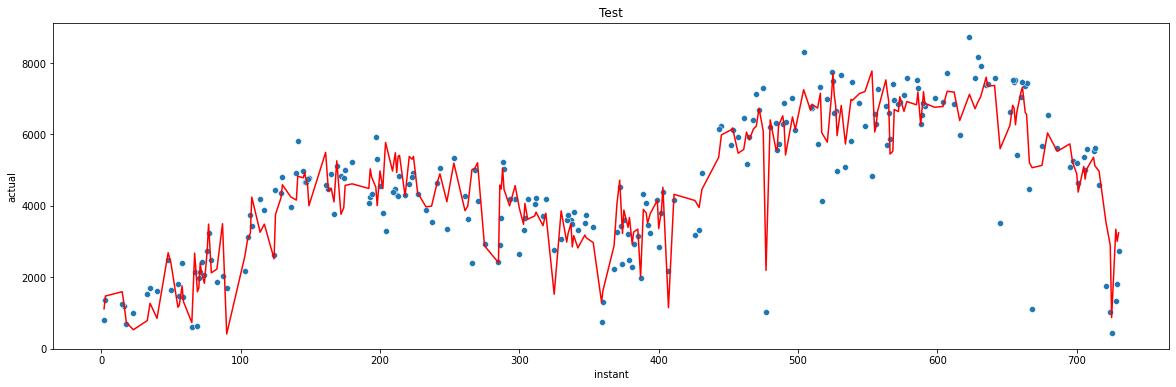

In [36]:
spec_cols = get_n_features_rfe(model=baseline_lr,
    X_train=X_train_encoded, 
    y_train=y_train
)
drop_cols = [x for x in X_train_encoded.columns if x not in spec_cols]
print(drop_cols)

print("Inital no. of columns to be dropped", len(drop_cols))
processed_details = process_significance_vif('', drop_cols=drop_cols)
print("After processing no. of columns to be dropped", len(drop_cols))
print(drop_cols)
# print("==="*20)

spec_cols = [x for x in X_train_encoded.columns if x not in drop_cols]

processed_lr_rfe_manual = train_test_model(X_train=X_train_encoded[spec_cols],
    y_train=y_train,
    X_test=X_test_encoded[spec_cols],
    y_test=y_test
)
processed_details[1]

Inital no. of columns to be dropped 13
 [R2: 0.835, Adj.R2: 0.83  VIF is 16] ---> Dropping mnth_8 : 0.134
After processing no. of columns to be dropped 15
['mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'hum', 'mnth_8']
------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8345438481860117
Test Accuracy: 0.8318179729592379


,Features,VIF
0,temp,16.34
3,season_3,6.69
1,windspeed,4.49
10,workingday_1,4.32
2,season_2,3.53
4,season_4,2.84
5,yr_1,1.97
9,weekday_6,1.73
8,mnth_10,1.57
11,weathersit_2,1.54


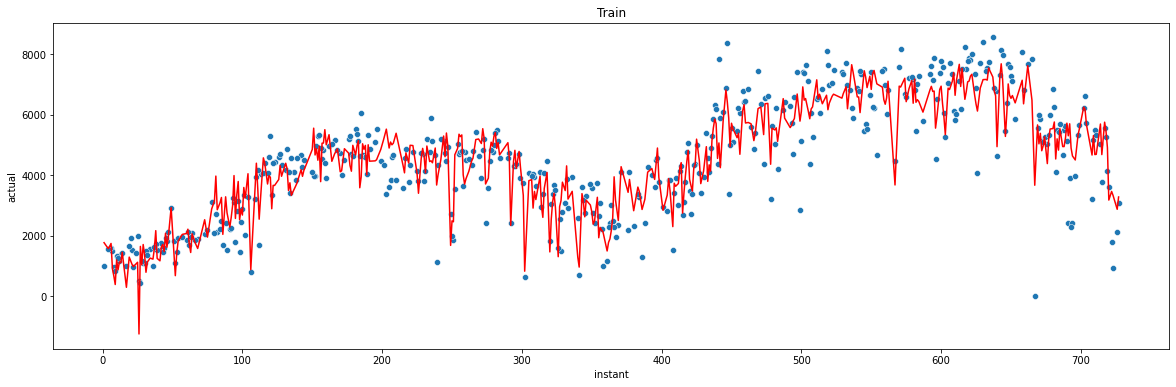

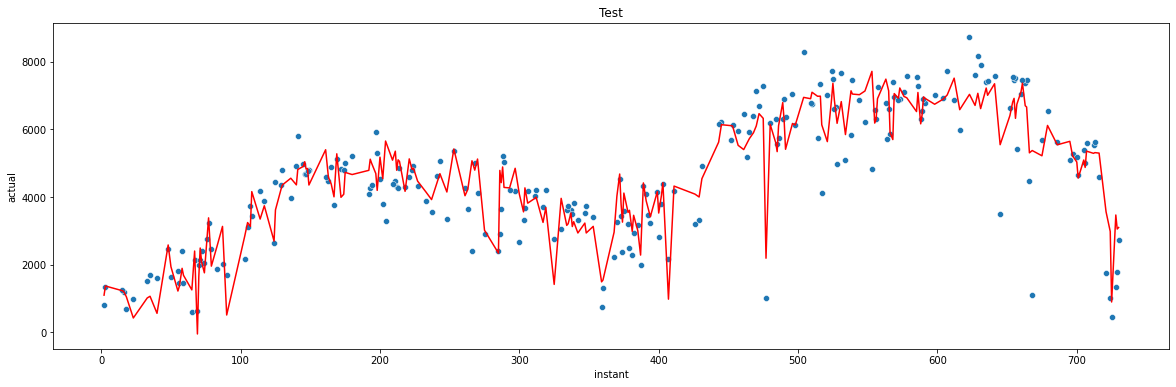

In [37]:
print("Inital no. of columns to be dropped", len(drop_cols))
processed_details = process_significance_vif('hum', drop_cols=drop_cols)
print("After processing no. of columns to be dropped", len(drop_cols))
print(drop_cols)
print("==="*20)

spec_cols = [x for x in X_train_encoded.columns if x not in drop_cols]

processed_lr_rfe_manual = train_test_model(X_train=X_train_encoded[spec_cols],
    y_train=y_train,
    X_test=X_test_encoded[spec_cols],
    y_test=y_test
)
processed_details[1]

Inital no. of columns to be dropped 15
 [R2: 0.829, Adj.R2: 0.825 ] ---> Dropping mnth_3 : 0.145
After processing no. of columns to be dropped 17
['mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'hum', 'mnth_8', 'season_3', 'mnth_3']
------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8286739229657978
Test Accuracy: 0.8188868014168108


,Features,VIF
0,temp,4.84
1,windspeed,4.30
8,workingday_1,4.22
4,yr_1,1.93
3,season_4,1.88
7,weekday_6,1.72
2,season_2,1.62
6,mnth_10,1.54
9,weathersit_2,1.53
5,mnth_9,1.26


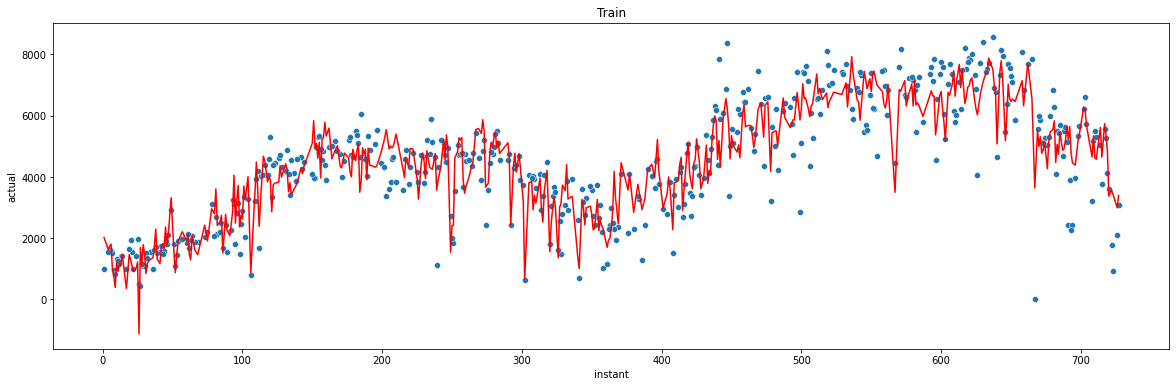

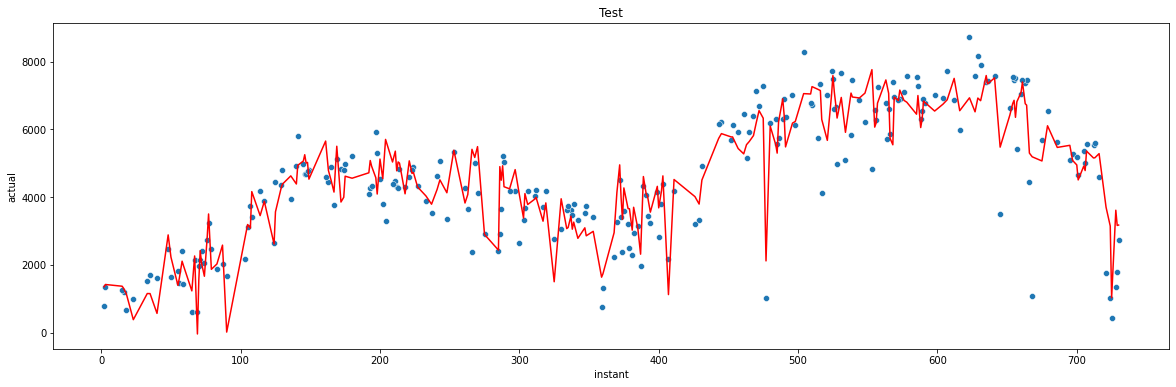

In [38]:
print("Inital no. of columns to be dropped", len(drop_cols))
processed_details = process_significance_vif('season_3', drop_cols=drop_cols)
print("After processing no. of columns to be dropped", len(drop_cols))
print(drop_cols)
print("==="*20)

spec_cols = [x for x in X_train_encoded.columns if x not in drop_cols]

processed_lr_rfe_manual = train_test_model(X_train=X_train_encoded[spec_cols],
    y_train=y_train,
    X_test=X_test_encoded[spec_cols],
    y_test=y_test
)
lr_summary_rfe_manual = processed_details[0]
processed_details[1]

------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8282242163627512
Test Accuracy: 0.818216495255093


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.01e-175
Time:                        22:40:40   Log-Likelihood:                -3962.4
No. Observations:                 489   AIC:                             7949.
Df Residuals:                     477   BIC:                             7999.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          635.1968    169.981      3.737      0.000     301.192     969.201
temp          4696.9585    175.308     26.793      0.000    4352.487    5041.430
windspeed     -886.3874    204.755     -4.329      0.000   -1288.721    -484.054
season_2       681.0283     93.104      7.315      0.000     498.083     863.973
season_4       932.0677    106.921      8.717      0.000     721.973    1142.162
yr_1          2053.4923     74.057     27.728      0.000    1907.973    2199.011
mnth_9         853.8940    135.750      6.290      0.000     587.151    1120.637
mnth_10        596.2580    163.323      3.651      0.000     275.336     917.180
weekday_6      597.6635    132.031      4.527      0.000     338.228     857.099
workingday_1   447.8337    101.090      4.430      0.000     249.196     646.471
weathersit_2  -612.1081     78.951     -7.753      0.000    -767.243    -456.973
weathersit_3 -2578.9188    228.178    -11.302      0.000   -3027.277   -2130.560
==============================================================================
Omnibus:                       57.188   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.998
Skew:                          -0.710   Prob(JB):                     4.31e-23
Kurtosis:                       4.743   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

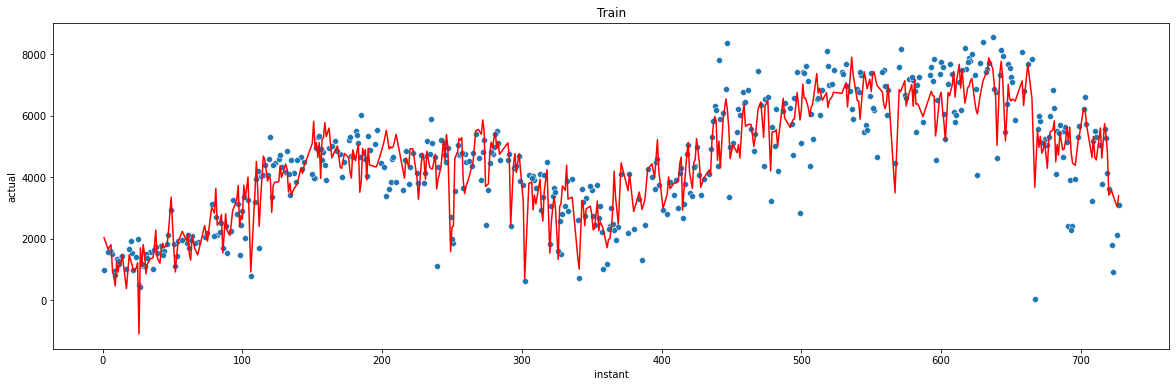

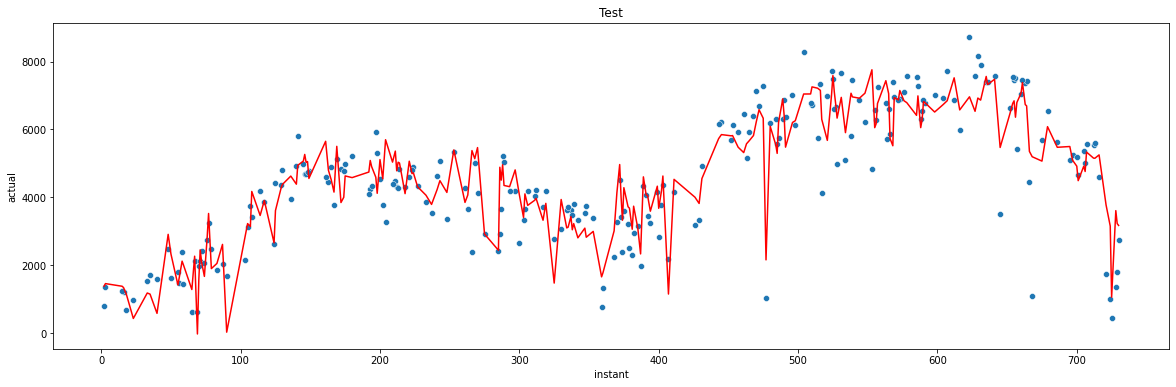

In [39]:
processed_lr_rfe_manual_outliers = train_test_model(X_train=X_train_outliers[spec_cols],
    y_train=y_train_outliers,
    X_test=X_test_encoded[spec_cols],
    y_test=y_test
)
lr_summary_rfe_manual_outliers = processed_details[0]
lr_summary_rfe_manual_outliers

### Manual

Inital no. of columns to be dropped 0
 [R2: 0.849, Adj.R2: 0.84  VIF is 46] ---> Dropping mnth_2 : 0.969
 [R2: 0.849, Adj.R2: 0.84  VIF is 42] ---> Dropping weekday_3 : 0.965
 [R2: 0.849, Adj.R2: 0.84  VIF is 42] ---> Dropping mnth_11 : 0.701
 [R2: 0.849, Adj.R2: 0.84  VIF is 41] ---> Dropping holiday_1 : 0.597
 [R2: 0.849, Adj.R2: 0.841  VIF is 40] ---> Dropping weekday_4 : 0.647
 [R2: 0.848, Adj.R2: 0.841  VIF is 40] ---> Dropping weekday_2 : 0.679
 [R2: 0.848, Adj.R2: 0.841  VIF is 40] ---> Dropping mnth_12 : 0.565
 [R2: 0.848, Adj.R2: 0.841  VIF is 40] ---> Dropping weekday_5 : 0.377
 [R2: 0.848, Adj.R2: 0.842  VIF is 40] ---> Dropping mnth_7 : 0.258
 [R2: 0.848, Adj.R2: 0.841  VIF is 27] ---> Dropping mnth_4 : 0.154
 [R2: 0.847, Adj.R2: 0.841  VIF is 26] ---> Dropping mnth_6 : 0.119
 [R2: 0.846, Adj.R2: 0.841  VIF is 22] ---> Dropping mnth_5 : 0.078
After processing no. of columns to be dropped 12
['mnth_2', 'weekday_3', 'mnth_11', 'holiday_1', 'weekday_4', 'weekday_2', 'mnth_12',

,Features,VIF
0,temp,22.23
1,hum,11.64
4,season_3,8.04
2,windspeed,4.56
13,workingday_1,4.49
3,season_2,3.58
5,season_4,2.89
14,weathersit_2,2.39
6,yr_1,1.97
12,weekday_6,1.81


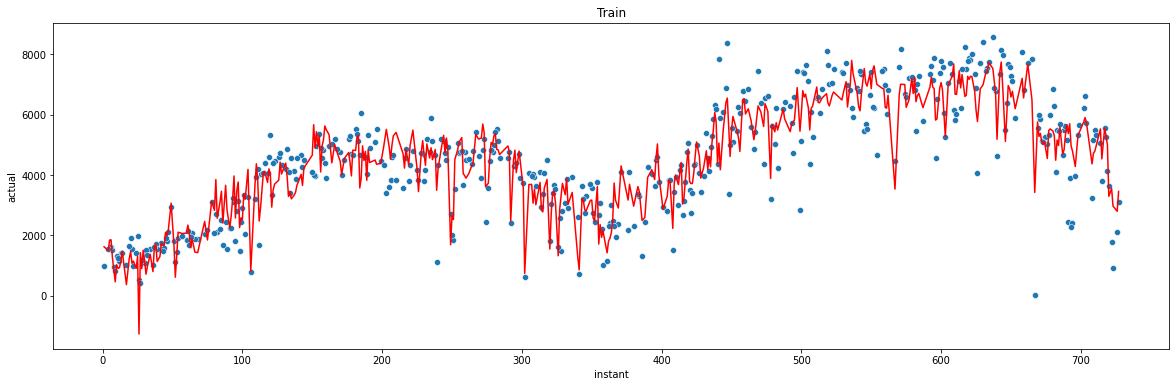

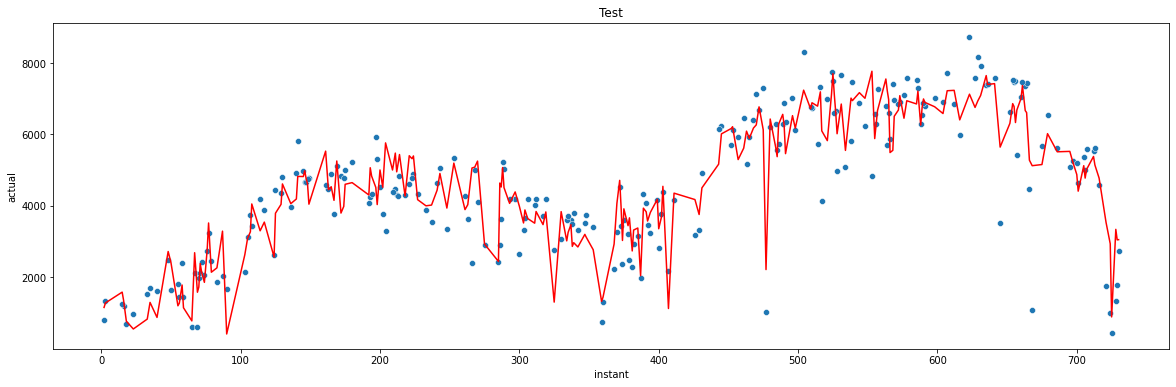

In [40]:
drop_cols = []
print("Inital no. of columns to be dropped", len(drop_cols))
processed_details = process_significance_vif('', drop_cols=drop_cols)
print("After processing no. of columns to be dropped", len(drop_cols))
print(drop_cols)
# print("==="*20)

spec_cols = [x for x in X_train_encoded.columns if x not in drop_cols]

processed_lr_manual = train_test_model(X_train=X_train_encoded[spec_cols],
    y_train=y_train,
    X_test=X_test_encoded[spec_cols],
    y_test=y_test
)
processed_details[1]

Inital no. of columns to be dropped 12
 [R2: 0.844, Adj.R2: 0.839  VIF is 8] ---> Dropping mnth_3 : 0.082
After processing no. of columns to be dropped 14
['mnth_2', 'weekday_3', 'mnth_11', 'holiday_1', 'weekday_4', 'weekday_2', 'mnth_12', 'weekday_5', 'mnth_7', 'mnth_4', 'mnth_6', 'mnth_5', 'season_3', 'mnth_3']
------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8425359754304662
Test Accuracy: 0.8290583848147985


,Features,VIF
1,hum,11.02
0,temp,8.85
11,workingday_1,4.45
2,windspeed,4.40
12,weathersit_2,2.36
4,season_4,2.10
5,yr_1,1.93
3,season_2,1.89
10,weekday_6,1.81
8,mnth_10,1.56


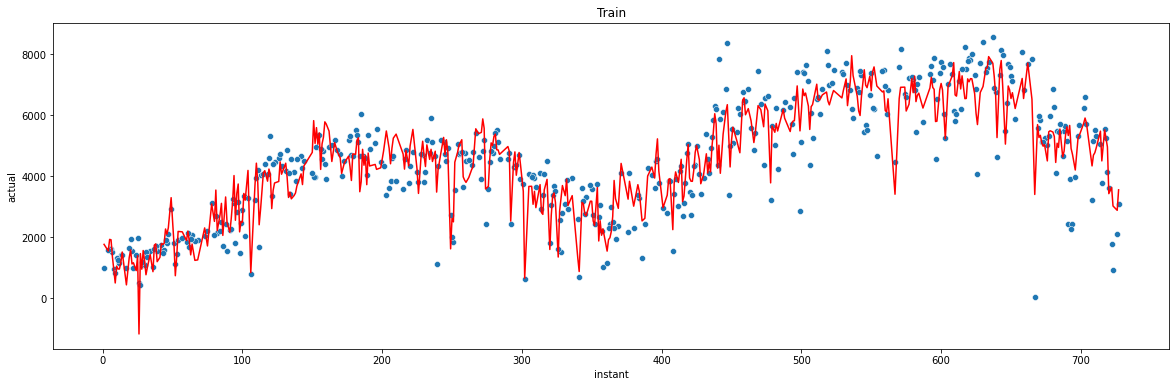

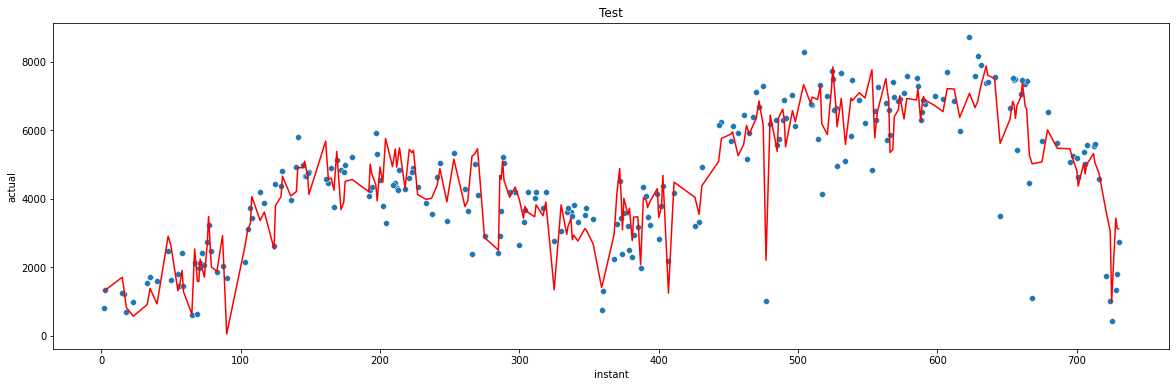

In [41]:
print("Inital no. of columns to be dropped", len(drop_cols))
processed_details = process_significance_vif('season_3', drop_cols=drop_cols)
print("After processing no. of columns to be dropped", len(drop_cols))
print(drop_cols)
print("==="*20)

spec_cols = [x for x in X_train_encoded.columns if x not in drop_cols]

processed_lr_manual = train_test_model(X_train=X_train_encoded[spec_cols],
    y_train=y_train,
    X_test=X_test_encoded[spec_cols],
    y_test=y_test
)
processed_details[1]

Inital no. of columns to be dropped 14
After processing no. of columns to be dropped 15
['mnth_2', 'weekday_3', 'mnth_11', 'holiday_1', 'weekday_4', 'weekday_2', 'mnth_12', 'weekday_5', 'mnth_7', 'mnth_4', 'mnth_6', 'mnth_5', 'season_3', 'mnth_3', 'hum']
------------------------------------------------------------------------------------------------------------------------
Train Accuracy: 0.8330508592287718
Test Accuracy: 0.8238889322577031


,Features,VIF
0,temp,6.16
1,windspeed,4.38
10,workingday_1,4.23
3,season_4,1.94
4,yr_1,1.93
2,season_2,1.88
9,weekday_6,1.74
7,mnth_10,1.56
11,weathersit_2,1.54
5,mnth_8,1.51


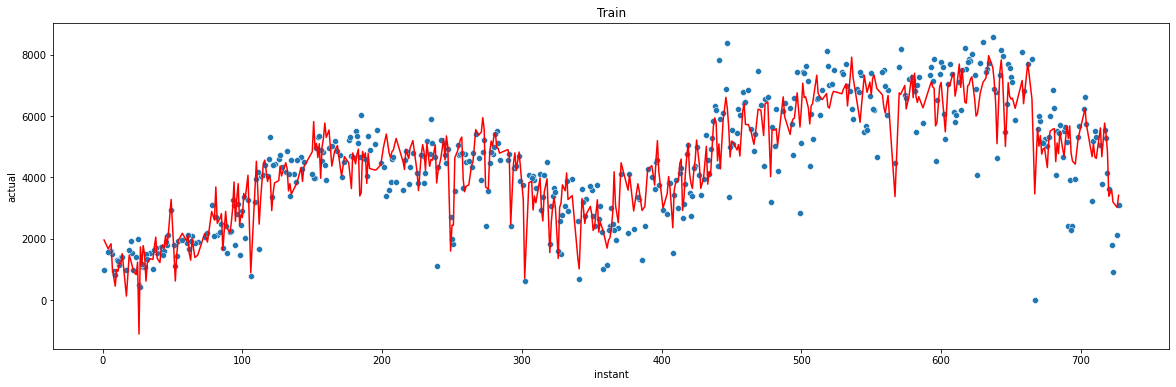

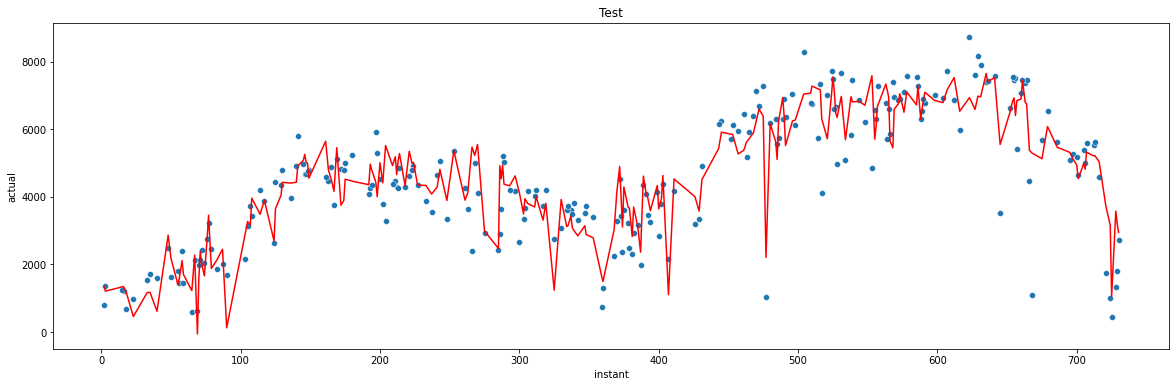

In [42]:
print("Inital no. of columns to be dropped", len(drop_cols))
processed_details = process_significance_vif('hum', drop_cols=drop_cols)
print("After processing no. of columns to be dropped", len(drop_cols))
print(drop_cols)
# print("==="*20)

spec_cols = [x for x in X_train_encoded.columns if x not in drop_cols]

processed_lr_manual = train_test_model(X_train=X_train_encoded[spec_cols],
    y_train=y_train,
    X_test=X_test_encoded[spec_cols],
    y_test=y_test
)
lr_summary_manual = processed_details[0]
processed_details[1]

In [43]:
lr_summary_manual

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     182.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.71e-175
Time:                        22:40:43   Log-Likelihood:                -3956.0
No. Observations:                 489   AIC:                             7940.
Df Residuals:                     475   BIC:                             7999.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          706.9824    169.781      4.164      0.000     373.367    1040.598
temp          4485.9623    193.331     23.204      0.000    4106.073    4865.852
windspeed     -859.9884    203.423     -4.228      0.000   -1259.709    -460.267
season_2       778.9914     99.095      7.861      0.000     584.272     973.711
season_4       967.2203    106.733      9.062      0.000     757.493    1176.948
yr_1          2058.6536     73.278     28.094      0.000    1914.664    2202.643
mnth_8         389.7811    155.136      2.513      0.012      84.943     694.620
mnth_9         966.8413    140.346      6.889      0.000     691.065    1242.618
mnth_10        658.1744    162.552      4.049      0.000     338.765     977.584
weekday_1     -256.6813    107.034     -2.398      0.017    -467.000     -46.363
weekday_6      543.4594    131.818      4.123      0.000     284.441     802.478
workingday_1   444.7827    100.040      4.446      0.000     248.207     641.358
weathersit_2  -625.2003     78.597     -7.954      0.000    -779.642    -470.759
weathersit_3 -2591.8119    225.937    -11.471      0.000   -3035.772   -2147.851
==============================================================================
Omnibus:                       51.577   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.962
Skew:                          -0.638   Prob(JB):                     1.45e-21
Kurtosis:                       4.755   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Performance

In [65]:
def generate_eq(model):
    s = ''
    for col, coef in zip(model.feature_names_in_.tolist(), model.coef_.tolist()[0]):
        tmp = f'({coef} * {col})'
        s = s+'+'+tmp if s!='' else tmp
    print('cnt = '+ s + '+(error)')

--------------------------------------------------------------------------------------------------------------------------------------------
Model:  rfe
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     170.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.39e-179
Time:                        22:40:38   Log-Likelihood:                -3940.0
No. Observations:                 489   AIC:                             7912.
Df Residuals:                     473   BIC:                             7979.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t| 

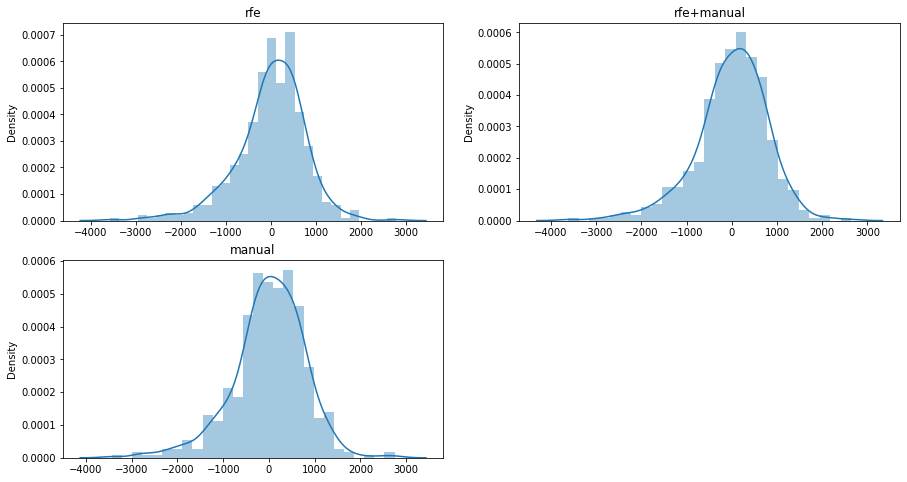

In [66]:
models = {
    'rfe' : (lr_summary_rfe, processed_lr_rfe),
    'rfe+manual': (lr_summary_rfe_manual, processed_lr_rfe_manual),
    'manual': (lr_summary_manual, processed_lr_manual),
    # 'rfe+outliers': (lr_summary_rfe_manual_outliers, processed_lr_rfe_manual_outliers)
}

plot_residuals = lambda y_true, y_pred: sns.distplot((y_true-y_pred))

cntr = 0
plt.figure(figsize=(15, 8))
for key, (model_summary, model) in models.items():
    print("-------"*20)
    print("Model: ", key)
    print(model_summary)
    pred_train = model.predict(X_train_encoded[model.feature_names_in_])
    pred_test = model.predict(X_test_encoded[model.feature_names_in_])
    cntr += 1
    plt.subplot(2, 2, cntr)
    plot_residuals(y_true=y_train, y_pred=pred_train)
    plt.title(key)

    print("Train Accuracy:", r2_score(y_true=y_train, y_pred=pred_train))
    print("Test Accuracy:", r2_score(y_true=y_test, y_pred=pred_test))
    generate_eq(model=model)

In [64]:
generate_eq(processed_lr_manual)

cnt = (4485.962284823488 * temp)+(-859.9883749371888 * windspeed)+(778.9914142901054 * season_2)+(967.2203318730475 * season_4)+(2058.6536292128794 * yr_1)+(389.7810960821863 * mnth_8)+(966.84133705371 * mnth_9)+(658.174427075562 * mnth_10)+(-256.6813281351482 * weekday_1)+(543.4593767356683 * weekday_6)+(444.78269682982034 * workingday_1)+(-625.2003229694346 * weathersit_2)+(-2591.811944125447 * weathersit_3)+(error)


In [61]:
list(zip(processed_lr_manual.feature_names_in_.tolist(), processed_lr_manual.coef_.tolist()[0]))

[('temp', 4485.962284823488),
 ('windspeed', -859.9883749371888),
 ('season_2', 778.9914142901054),
 ('season_4', 967.2203318730475),
 ('yr_1', 2058.6536292128794),
 ('mnth_8', 389.7810960821863),
 ('mnth_9', 966.84133705371),
 ('mnth_10', 658.174427075562),
 ('weekday_1', -256.6813281351482),
 ('weekday_6', 543.4593767356683),
 ('workingday_1', 444.78269682982034),
 ('weathersit_2', -625.2003229694346),
 ('weathersit_3', -2591.811944125447)]

In [49]:
processed_lr_manual.feature_names_in_.tolist()

['temp',
 'windspeed',
 'season_2',
 'season_4',
 'yr_1',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'weekday_1',
 'weekday_6',
 'workingday_1',
 'weathersit_2',
 'weathersit_3']